(activity8_live)=

# Activity 8: Classification predictions and gradients Live

**2026-02-24**

# Imports and data loading

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from palmerpenguins import load_penguins
from sklearn.linear_model import LogisticRegression

In [4]:
# Load Palmer Penguins and filter to Adelie vs Chinstrap
df = load_penguins()
penguin_df = df[df["species"].isin(["Adelie", "Chinstrap"])].dropna(subset=["bill_length_mm", "bill_depth_mm"])

# Features: bill_length_mm and bill_depth_mm
X_train = penguin_df[["bill_length_mm", "bill_depth_mm"]].values
feature_names = ["bill_length_mm", "bill_depth_mm"]

# Labels: Adelie = 0, Chinstrap = 1
y_train = (penguin_df["species"] == "Chinstrap").astype(int).values

print(f"Number of examples: {len(y_train)}")
print(f"Number of Adelie (y=0): {np.sum(y_train == 0)}")
print(f"Number of Chinstrap (y=1): {np.sum(y_train == 1)}")
print(f"Feature matrix shape: {X_train.shape}")

penguin_df['y'] = y_train

Number of examples: 219
Number of Adelie (y=0): 151
Number of Chinstrap (y=1): 68
Feature matrix shape: (219, 2)


# Part 1: Linear decision boundaries

The above cell loads in our data into `penguin_df`.

Let's visualize our two features, colored by species. Let's create a scatterplot with:

- `x="bill_length_mm"`
- `y="bill_depth_mm"`
- `hue="species"`
- `data=penguin_df`
- `alpha=0.6`

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,y
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007,0


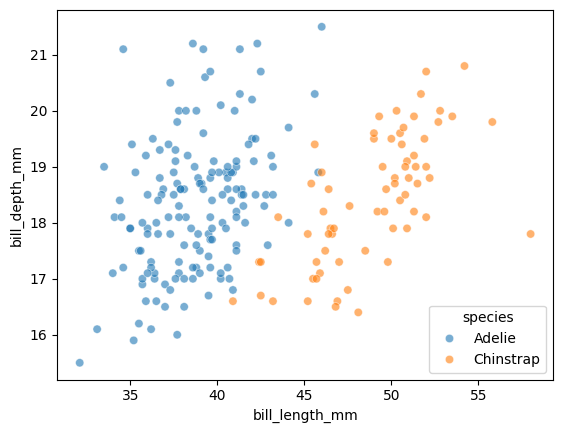

In [6]:
sns.scatterplot(
    x="bill_length_mm", 
    y="bill_depth_mm",
    hue="species", 
    data=penguin_df,
    alpha=0.6
)
display(penguin_df.head())

Suppose that we have the following weights:

In [8]:
# Weights for a 2D model using bill_length_mm and bill_depth_mm
w0 = -24.5
w1 = 1.35   # weight for bill_length_mm (x1)
w2 = -1.9   # weight for bill_depth_mm (x2)

We can again solve for the decision boundary by setting $h=0$:

$$0 = w_0 + w_1 x_1 + w_2 x_2$$

$x_2$ is on the y-axis in our plot, so we can solve for it:

$$
-w_2 x_2 = w_0 + w_1 x_1 \quad \Longrightarrow \quad x_2 = -\frac{w_0 + w_1 x_1}{w_2}
$$

Let's plot this line over our data:







(15.0, 22.0)

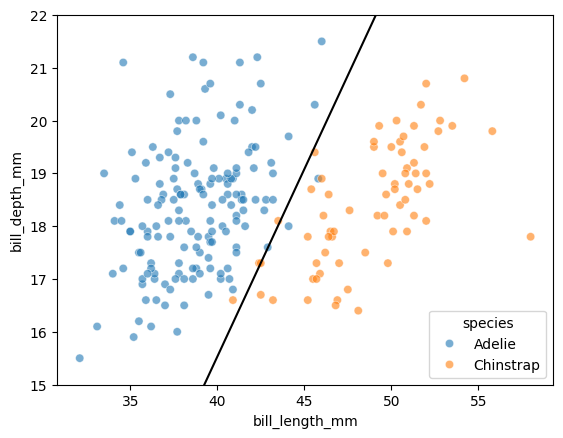

In [13]:
# Two x1 endpoints to draw the boundary line
x1 = np.array([35, 55])


# TODO compute the corresponding x2 values on the decision boundary
x2 = -(w0 + w1*x1) / w2

sns.scatterplot(
    x="bill_length_mm", 
    y="bill_depth_mm",
    hue="species", 
    data=penguin_df,
    alpha=0.6
)
plt.plot(x1, x2, color="black")
plt.ylim(15,22)
#plt.xlim(40, 50)

:::{admonition} Takeaway

Even though the sigmoid function is non-linear, the decision boundary is going to be linear in the features!

:::

# Part 2: Generating probabilities and predictions

[LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) from scikit-learn works the same way as [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html): we call `.fit(X, y)` to train the model.

In [14]:
# TODO creates a LogisticRegression model and fit it on X and y
model = LogisticRegression()
model.fit(X_train, y_train)

# Print the learned weights
print(f"Intercept (w0): {model.intercept_[0]:.4f}")
print(f"Weights: {model.coef_[0]}")
print(f"  w1 (bill_length): {model.coef_[0][0]:.4f}")
print(f"  w2 (bill_depth):  {model.coef_[0][1]:.4f}")

Intercept (w0): -24.5494
Weights: [ 1.35804435 -1.92413248]
  w1 (bill_length): 1.3580
  w2 (bill_depth):  -1.9241


But unlike `LinearRegression`, logistic regression can output probabilities using the `.predict_proba()` method:

This returns an array of shape `(n, 2)` where:
- Column 0: probability of class 0 (Adelie)
- Column 1: probability of class 1 (Chinstrap)

In [15]:
# TODO: call predict_proba() on the model with input X
proba = model.predict_proba(X_train)

print(f"Shape of proba: {proba.shape}")
print(f"\nFirst 5 rows of proba:")
print(proba[:5])

Shape of proba: (219, 2)

First 5 rows of proba:
[[9.99407822e-01 5.92177979e-04]
 [9.87709002e-01 1.22909979e-02]
 [9.88508221e-01 1.14917793e-02]
 [9.99992825e-01 7.17502671e-06]
 [9.99979912e-01 2.00882817e-05]]


Predictions are then made by picking the class with the highest probability:

In [16]:
# TODO: call predict on the model with input X
preds = model.predict(X_train)

print(f"Shape of preds: {preds.shape}")
print(f"\nFirst 5 rows of preds:")
print(preds[:5])


Shape of preds: (219,)

First 5 rows of preds:
[0 0 0 0 0]


Let's look at how to compute these outputs on our own.

Suppose we have the $P(y = 1)$ probabilities from the slides:

In [17]:
proba1_chinstrap = np.array([0.16, 0.78, 0.29, 0.92, 0.52])

print(proba1_chinstrap)
print(proba1_chinstrap.shape)

[0.16 0.78 0.29 0.92 0.52]
(5,)


To convert a 1D array of shape `(n,)` into a 2D array with shape `(n, 1)`, we can use [np.reshape](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html):

In [18]:
# the -1 means "infer the size of the other dimension"
proba1_chinstrap = proba1_chinstrap.reshape(-1, 1)

print(proba1_chinstrap)
print(proba1_chinstrap.shape)

[[0.16]
 [0.78]
 [0.29]
 [0.92]
 [0.52]]
(5, 1)


Since we know that probabilities must sum to 1, what is the line of code that can generate the 2D array for the $P(y = 0)$ probabilities? **Hint**: recall what happens when we perform arithmetic between a number and a NumPy array.

Submit the line of code here: https://pollev.com/tliu

In [20]:
# TODO: this can be done in one line!
proba0_adelie = 1 - proba1_chinstrap

print(proba0_adelie)

[[0.84]
 [0.22]
 [0.71]
 [0.08]
 [0.48]]


[np.column_stack()](https://numpy.org/doc/stable/reference/generated/numpy.column_stack.html) then can be used to stack arrays column-wise:

In [21]:
proba_array = np.column_stack([proba0_adelie, proba1_chinstrap])

print(proba_array)

[[0.84 0.16]
 [0.22 0.78]
 [0.71 0.29]
 [0.08 0.92]
 [0.48 0.52]]


How do we then go from this `proba_array` to a 1D array of predictions?

[np.argmax()](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html) finds the **index** of the maximum value, and can be used with axis operations

- axis=1 means: find the index of the maximum value within each row
- axis=0 means: find the index of the maximum value within each column
- no axis means: find the index of the maximum value in the entire array

Note the shape changes:

In [24]:
print(proba_array)
print(proba_array.shape)  # (n, 2)
print("-----------------")

print(np.argmax(proba_array, axis=1))

[[0.84 0.16]
 [0.22 0.78]
 [0.71 0.29]
 [0.08 0.92]
 [0.48 0.52]]
(5, 2)
-----------------
[0 1 0 1 1]


What axis should we use to generate predictions from `proba_array`?

In [25]:
predictions = np.argmax(proba_array, axis=1)

# Part 3: Broadcasting practice

On HW 1, we computed the gradient descent update rule "manually" for each of the weights:

$$
w_{1, \text{new}} &= w_{1, \text{old}} - \alpha \frac{\partial \mathcal{L}}{\partial w_1} \\
w_{2, \text{new}} &= w_{2, \text{old}} - \alpha \frac{\partial \mathcal{L}}{\partial w_2}
$$

Today, we'll practice using broadcasting to perform a gradient update for all the weights at once.

Suppose we had some loss function $\mathcal{L}$ such that the gradient with respect to weights $w_1, w_2, \ldots, w_p$ is given by:

$$
\frac{\partial \mathcal{L}}{\partial w_j} = \sum_{i=1}^n y_i x_{i,j}
$$

This gives the gradient update rule for all the weights:

$$
w_{j, \text{new}} = w_{j, \text{old}} - \alpha \sum_{i=1}^n y_i x_{i,j}
$$

Given the y's as a 1D array `y` of shape `(n,)`, and the data matrix `X` of shape `(n, p)`, we can compute the gradient update for all the weights at once using broadcasting.

Let's trace through the broadcasting with a small example ($n=3$ examples, $p=2$ features):

In [26]:
# Small example to show broadcasting
X = np.array([[1, 2],
              [2, 4],
              [5, 6]])
y = np.array([1, 0, 1])

print(f"X shape: {X.shape}")
print(X)
print("-----------------")

print(f"y shape: {y.shape}")
print(y)

X shape: (3, 2)
[[1 2]
 [2 4]
 [5 6]]
-----------------
y shape: (3,)
[1 0 1]


Out goal is to compute the summation gradient term for all the weights simultaneously with broadcasting:

$$
\begin{bmatrix}
\sum_{i=1}^n y_i x_{i,1} & \sum_{i=1}^n y_i x_{i,2}
\end{bmatrix}
$$


To do so, we multiply each feature of `X` by `y` element-wise:

$$
\begin{bmatrix}
1\times1 & 1\times2 \\
0 \times 2 & 0 \times 4 \\
1 \times 5 & 1 \times 6 \end{bmatrix} = \begin{bmatrix}
1 & 2 \\
0 & 0 \\
5 & 6 \end{bmatrix}
$$

And then sum over the rows:

$$
\begin{bmatrix}
1 + 0 + 5 & 2 + 0 + 6 
\end{bmatrix}  = \begin{bmatrix}
6 & 8
\end{bmatrix}
$$



In order for `y` to broadcast with `X`, we need to reshape `y` to have shape `(3, 1)`:

In [29]:
# TODO: update y to be 2D with shape (n, 1)
y_reshaped = y.reshape(-1, 1)

print(y_reshaped)
print(y_reshaped.shape)

[[1]
 [0]
 [1]]
(3, 1)


In [31]:
# this will give us a broadcasting error
#y * X

# TODO: use y_shaped to properly broadcast with X
y_reshaped * X

array([[1, 2],
       [0, 0],
       [5, 6]])

Then, we use axis=0 to np.sum over the rows:

In [33]:
# TODO take the sum over the rows, resulting in shape (p,)
# if this array is (n,p)
result = np.sum(y_reshaped * X, axis=0)

print(result)
print(result.shape)

[6 8]
(2,)


`result` is a 1D array with shape `(p,)`, which can be used to update all the weights at once:

$$
w_{1, \text{new}} &= w_{1, \text{old}} - \alpha \underbrace{\sum_{i=1}^n y_i x_{i,1}}_{\text{result[0]}} \\
w_{2, \text{new}} &= w_{2, \text{old}} - \alpha \underbrace{\sum_{i=1}^n y_i x_{i,2}}_{\text{result[1]}}
$$

In [ ]:
w_old = np.array([0, 1])
alpha = 0.1

# TODO: all 2 weights are updated at once without a loop
w_new = w_old - alpha * result


NumPy broadcasting allows this to work for any number of features $p$, and the gradient update on HW 2 will use this same technique.